In [20]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import the dataset

In [21]:
datasets = pd.read_csv("C:/Users/EBEN-SUCCESS/Desktop/AIM/Zummit Africa/RandomForest/mobile_ads.csv")

In [3]:
datasets.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

Splitting the dataset into training and test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Fitting the classifier into the training data

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

Predicting the test set result

In [26]:
y_preds = classifier.predict(X_test)

Making a confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)

Finding Mean Absolute Error

In [29]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_preds)
print(mae)

0.08


Visualizing the trainng set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


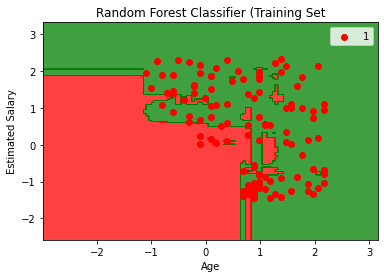

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


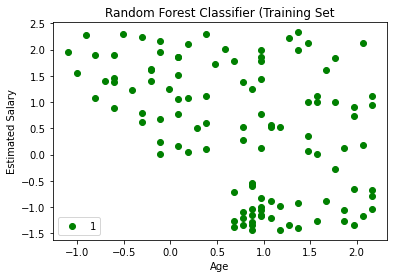

In [43]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() -1, stop = X_set[:, 0]. max() +1, step=0.01),
np.arange(start=X_set[:, 1].min() -1, stop=X_set[:, 1].max() +1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, u in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set ==j, 1],
    c  = ListedColormap(('red', 'green'))(i), label =j)
    plt.title('Random Forest Classifier (Training Set')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()